In [1]:
!python3 --version
!pip3 list

Python 3.8.10
Package                 Version
----------------------- --------------------
absl-py                 0.13.0
anyio                   3.2.1
appdirs                 1.4.3
apturl                  0.5.2
argon2-cffi             20.1.0
astunparse              1.6.3
async-generator         1.10
attrs                   21.2.0
autopep8                1.5.7
Babel                   2.9.1
backcall                0.2.0
beautifulsoup4          4.9.3
bitarray                2.3.3
bleach                  3.3.0
blinker                 1.4
Brlapi                  0.7.0
cachetools              4.2.2
certifi                 2019.11.28
cffi                    1.14.5
chardet                 3.0.4
chrome-gnome-shell      0.0.0
clang                   5.0
Click                   7.0
colorama                0.4.3
command-not-found       0.3
cryptography            2.8
cupshelpers             1.0
cycler                  0.10.0
dbus-python             1.2.16
decorator               5.0.9
defer      

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
import os
import pandas as pd
import numpy as np
import modules.model as Model
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

In [4]:
X_train, y_train = Model.loadData("./data/data/train")
X_train = X_train.fillna("")

In [5]:
display(X_train, y_train)

,raw_comment,normalize_comment,emoji_decode
0,form k đẹp lắm,form không đẹp lắm,
1,Áo Rộng thật sự\nGl nhanh\nChật lươ...,áo rộng thật sự nhanh chật lượng v...,
2,Màu túi hơi tối do với ảnh chụp,màu túi hơi tối do ảnh chụp,
3,Chất liệu vải k ổn lắm,chất liệu vải không ổn lắm,
4,"Mã ""màu đen"" hiện lên áo màu đen, còn ...",mã màu đen hiện lên áo màu đen còn mã...,
...,...,...,...
11359,"Khi bán combo ghi 3 đôi, nhưng nhận chỉ ...",bán combo ghi đôi nhưng nhận chỉ đôi ta...,
11360,"Áo đẹp, from chuẩn. Sẽ ủng hộ tiếp ạ !",áo đẹp from chuẩn sẽ ủng hộ tiếp,
11361,Đặt màu trắng kem thì giao màu xanh đen...,đặt màu trắng kem giao màu xanh đen giao...,expressionless
11362,Đồ chơi tí hon.\nShop nên dừng bán sp ...,đồ chơi tí hon nên dừng bán sản phẩ...,


,label
0,0
1,1
2,0
3,0
4,0
...,...
11359,0
11360,1
11361,0
11362,0


In [6]:
ngram_words = Model.getDashWords(X_train['normalize_comment'], [2, 3, 4])

In [7]:
ngram_words

,freq_doc,freq
giao hàng,1914,1914
sản phẩm,1803,1803
chất lượng,1377,1377
hàng nhanh,1082,1082
giao hàng nhanh,1027,1027
...,...,...
sáp không khô môi,1,1
không khô môi lưu,1,1
khô môi lưu màu,1,1
môi lưu màu cũng,1,1


In [8]:
print(len(ngram_words[ngram_words['freq_doc'] >= 10]))
print(len(ngram_words[ngram_words['freq_doc'] >= 20]))

3755
1540


In [9]:
X_train['dash_comment'] = Model.replaceInNGrams(X_train['normalize_comment'], [2, 3, 4], ngram_words, 'freq_doc')
X_train['dash_comment_min_20'] = Model.replaceInNGrams(X_train['normalize_comment'], [2, 3, 4], ngram_words, 'freq_doc', 20)

In [10]:
X_train

,raw_comment,normalize_comment,emoji_decode,dash_comment,dash_comment_min_20
0,form k đẹp lắm,form không đẹp lắm,,form_không đẹp_lắm,form_không đẹp_lắm
1,Áo Rộng thật sự\nGl nhanh\nChật lươ...,áo rộng thật sự nhanh chật lượng v...,,áo_rộng thật_sự nhanh_chật_lượng v...,áo_rộng thật_sự nhanh chật lượng v...
2,Màu túi hơi tối do với ảnh chụp,màu túi hơi tối do ảnh chụp,,màu túi_hơi tối_do ảnh_chụp,màu túi hơi tối do ảnh chụp
3,Chất liệu vải k ổn lắm,chất liệu vải không ổn lắm,,chất_liệu vải_không ổn_lắm,chất_liệu vải_không ổn lắm
4,"Mã ""màu đen"" hiện lên áo màu đen, còn ...",mã màu đen hiện lên áo màu đen còn mã...,,mã màu_đen hiện lên_áo màu_đen còn_mã...,mã màu_đen hiện lên áo màu_đen còn mã...
...,...,...,...,...,...
11359,"Khi bán combo ghi 3 đôi, nhưng nhận chỉ ...",bán combo ghi đôi nhưng nhận chỉ đôi ta...,,bán_combo ghi_đôi nhưng_nhận chỉ đôi_ta...,bán combo ghi đôi nhưng_nhận chỉ đôi_ta...
11360,"Áo đẹp, from chuẩn. Sẽ ủng hộ tiếp ạ !",áo đẹp from chuẩn sẽ ủng hộ tiếp,,áo_đẹp from_chuẩn sẽ ủng_hộ tiếp,áo_đẹp from chuẩn sẽ ủng_hộ tiếp
11361,Đặt màu trắng kem thì giao màu xanh đen...,đặt màu trắng kem giao màu xanh đen giao...,expressionless,đặt_màu trắng_kem giao_màu xanh_đen giao...,đặt_màu trắng kem giao_màu xanh đen giao...
11362,Đồ chơi tí hon.\nShop nên dừng bán sp ...,đồ chơi tí hon nên dừng bán sản phẩ...,,đồ_chơi tí_hon_nên_dừng bán sản_phẩ...,đồ chơi tí hon nên dừng bán sản_phẩ...


In [11]:
vectorizers = [
    ("Bag of Words", Model.vectorizer(X_train['dash_comment'], 'bow')),
    ("TF-IDF", Model.vectorizer(X_train['dash_comment'], 'tfidf')),
    ("Bag of Words- [min_df: 5]", Model.vectorizer(X_train['dash_comment'], 'bow', 5)),
    ("TF-IDF- [min_df: 5]", Model.vectorizer(X_train['dash_comment'], 'tfidf', 5)),
    ("Bag of Words - [min_df: 10]", Model.vectorizer(X_train['dash_comment'], 'bow', 10)),
    ("TF-IDF - [min_df: 10]", Model.vectorizer(X_train['dash_comment'], 'tfidf', 10)),
    ("Bag of Words - [min_df: 20]", Model.vectorizer(X_train['dash_comment'], 'bow', 20)),
    ("TF-IDF - [min_df: 20]", Model.vectorizer(X_train['dash_comment'], 'tfidf', 20))
]

ix = 0
print(len(vectorizers[ix][1][0].get_feature_names()))
print(vectorizers[ix][1][0].get_feature_names()[:100])
pd.DataFrame(data=vectorizers[ix][1][1].toarray(), columns=vectorizers[ix][1][0].get_feature_names())

20010
['a_a', 'a_av', 'a_bê', 'a_cho', 'a_cùng', 'a_e', 'a_hong', 'a_hời', 'a_rất', 'a_xã', 'ac_clone', 'ace', 'ad', 'ad_bọc', 'ad_gửi', 'ad_vào', 'ah', 'ah_ai', 'ah_nhen', 'ai', 'ai_chân', 'ai_có', 'ai_cũng', 'ai_cả', 'ai_cần', 'ai_dám', 'ai_dè', 'ai_eo', 'ai_không', 'ai_luôn', 'ai_làm', 'ai_mua', 'ai_muốn', 'ai_mà', 'ai_mất', 'ai_mặc', 'ai_nghĩ', 'ai_ngờ', 'ai_nhận', 'ai_nhắn', 'ai_review', 'ai_rãnh', 'ai_rộng', 'ai_tay', 'ai_thích', 'ai_trắng', 'ai_về', 'ai_đời', 'am', 'amazing', 'an', 'an_lành', 'an_toàn', 'and', 'and_tacos', 'and_think', 'android_gồm', 'anh', 'anh_chủ', 'anh_cute', 'anh_có', 'anh_de', 'anh_em', 'anh_giữ', 'anh_không', 'anh_muốn', 'anh_nên', 'anh_nói', 'anh_ship', 'anh_siêu', 'anh_đáng', 'anh_ơi', 'anh_ấy', 'any_nên', 'ao', 'ao_cũng', 'ao_kha', 'ao_khác', 'ao_như', 'ao_thi', 'ao_thun', 'ao_vua', 'auto', 'auto_hay', 'b_có', 'b_nào', 'b_nên', 'ba', 'ba_cai', 'ba_chấm', 'ba_con', 'ba_cái', 'ba_lô', 'ba_tia', 'ba_đôi', 'bai', 'bai_giãn', 'bam', 'ban', 'ban_cái']


,a_a,a_av,a_bê,a_cho,a_cùng,a_e,a_hong,a_hời,a_rất,a_xã,...,ủng_hộc,ức_chế,ức_x,ức_óc_ức_of,ứng_dụng_trên_android,ứng_luôn,ừ_mười,ừ_ừ,ửng,ửng_hộ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11360,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
ix = 3
print(len(vectorizers[ix][1][0].get_feature_names()))
print(vectorizers[ix][1][0].get_feature_names()[:100])
pd.DataFrame(data=vectorizers[ix][1][1].toarray(), columns=vectorizers[ix][1][0].get_feature_names())

2742
['ah', 'ai', 'ai_có', 'ai_cũng', 'ai_dè', 'ai_mua', 'ai_ngờ', 'anh', 'anh_em', 'ao', 'ban_đầu', 'bao', 'bao_bì', 'bao_giờ', 'bao_lâu', 'bao_nhiêu', 'bay_màu', 'be', 'biết', 'biết_là', 'bong_tróc', 'bung', 'bung_chỉ', 'bung_hết', 'bung_ra', 'buôn_bán', 'buồn', 'buồn_ghê', 'buồn_quá', 'buồn_vì', 'buộc_tóc', 'bàn_tay', 'bán', 'bán_hàng', 'bán_đắt', 'bán_đồ', 'báo', 'báo_giao', 'báo_khách', 'bát_gạo', 'bây_giờ', 'bé', 'bé_hơn', 'bé_quá', 'bé_tí', 'bé_xíu', 'bên', 'bên_hông', 'bên_ngoài', 'bên_trong', 'bình_luận', 'bình_thường', 'bò_nhạt', 'bò_đậm', 'bó', 'bó_tay', 'bóc_ra', 'bóng', 'bóp', 'bông_tai', 'bù', 'băng_đô', 'bạc', 'bạc_màu', 'bạn', 'bạn_bè', 'bạn_nào', 'bảng_size', 'bảo', 'bảo_gửi', 'bảo_hành', 'bảo_sẽ', 'bấm', 'bất_ngờ', 'bất_tiện', 'bẩn', 'bận', 'bằng', 'bằng_nhau', 'bằng_nhựa', 'bền', 'bền_không', 'bọc', 'bọc_hàng', 'bỏ', 'bỏ_luôn', 'bỏ_qua', 'bỏ_ra', 'bỏ_tiền', 'bỏ_vừa', 'bố', 'bộ', 'bộ_còn', 'bộ_hồng', 'bộ_đồ', 'bục', 'bục_chỉ', 'bụng', 'bực', 'cam']


,ah,ai,ai_có,ai_cũng,ai_dè,ai_mua,ai_ngờ,anh,anh_em,ao,...,ổn_so,ổn_trong,ổn_áp,ổn_đẹp,ở_ngoài,ở_nhà,ở_trong,ở_trên,ở_đây,ủng_hộ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
11360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.42178
11361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
11362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [13]:
ix = 5
print(len(vectorizers[ix][1][0].get_feature_names()))
print(vectorizers[ix][1][0].get_feature_names()[:100])
pd.DataFrame(data=vectorizers[ix][1][1].toarray(), columns=vectorizers[ix][1][0].get_feature_names())

1454
['ah', 'ai', 'ai_ngờ', 'anh', 'anh_em', 'ao', 'ban_đầu', 'bao', 'bao_giờ', 'bao_nhiêu', 'bay_màu', 'biết', 'biết_là', 'bung_chỉ', 'bung_hết', 'buôn_bán', 'buồn', 'buộc_tóc', 'bán', 'bán_hàng', 'bán_đắt', 'báo', 'báo_giao', 'bát_gạo', 'bé', 'bé_hơn', 'bên', 'bên_ngoài', 'bên_trong', 'bình_luận', 'bình_thường', 'bó_tay', 'bóc_ra', 'bóng', 'bóp', 'bông_tai', 'bù', 'bạn', 'bạn_nào', 'bảo', 'bảo_hành', 'bất_ngờ', 'bẩn', 'bận', 'bằng', 'bền', 'bền_không', 'bọc', 'bỏ', 'bỏ_ra', 'bỏ_tiền', 'bố', 'bộ', 'bộ_đồ', 'bục_chỉ', 'bụng', 'bực', 'can_than', 'cao', 'cao_mặc', 'cao_nặng', 'chat', 'chi_tiết', 'chim_ưng', 'chiếc', 'chiều_dài', 'cho', 'cho_cái', 'cho_có', 'cho_khách', 'cho_luôn', 'cho_lắm', 'cho_người', 'cho_vì', 'cho_đổi', 'chu_đáo', 'chuyên_nghiệp', 'chuyển_khoảng', 'chuẩn', 'chuẩn_hàng', 'chán', 'chán_lắm', 'chán_quá', 'chân', 'chân_váy', 'chú_ý', 'chúc', 'chúc_buôn', 'chút', 'chút_nhưng', 'chút_nào', 'chăm_sóc', 'chưa', 'chưa_biết', 'chưa_dùng', 'chưa_mặc', 'chưa_thấy', 'chưa_được',

,ah,ai,ai_ngờ,anh,anh_em,ao,ban_đầu,bao,bao_giờ,bao_nhiêu,...,ổn,ổn_lắm,ổn_nhưng,ổn_so,ổn_áp,ở_ngoài,ở_nhà,ở_trong,ở_đây,ủng_hộ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.685498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
11360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.42178
11361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
11362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [14]:
ix = 7
print(len(vectorizers[ix][1][0].get_feature_names()))
print(vectorizers[ix][1][0].get_feature_names()[-100:])
pd.DataFrame(data=vectorizers[ix][1][1].toarray(), columns=vectorizers[ix][1][0].get_feature_names())

754
['xong', 'xuất_sắc', 'xám', 'xíu', 'xù_lông', 'xấu', 'xấu_không', 'xịn', 'xịn_xò', 'y_hình', 'yên_tâm', 'yêu_cầu', 'áo', 'áo_chất', 'áo_có', 'áo_cũng', 'áo_hơi', 'áo_không', 'áo_mặc', 'áo_mỏng', 'áo_ok', 'áo_quá', 'áo_rất', 'áo_thun', 'áo_trắng', 'áo_vải', 'áo_xinh', 'áo_đẹp', 'ý_kiến', 'đen', 'đeo', 'đi', 'đáng', 'đáng_mua', 'đáng_tiền', 'đánh_giá', 'đây', 'đây_là', 'đòi_hỏi', 'đóng_gói', 'đôi', 'đôi_tất', 'đúng', 'đúng_là', 'đúng_màu', 'đúng_mẫu', 'đúng_như', 'đúng_size', 'đơn', 'đơn_hàng', 'đường_chỉ', 'đường_may', 'được', 'được_cái', 'được_giá', 'được_nhưng', 'được_tặng', 'đấy', 'đầu', 'đầy_đủ', 'đặt', 'đặt_cái', 'đặt_hàng', 'đặt_màu', 'đặt_size', 'đặt_xl', 'đặt_áo', 'đẹp', 'đẹp_chất', 'đẹp_hơn', 'đẹp_luôn', 'đẹp_lắm', 'đẹp_nhưng', 'đẹp_vải', 'đến', 'đều', 'đồ', 'đồng_hồ', 'đồng_tiền', 'đổi', 'đổi_hàng', 'đổi_size', 'đổi_trả', 'đợi', 'đủ_hàng', 'đừng', 'đựng_được', 'ơi', 'ưng', 'ưng_luôn', 'ưng_lắm', 'ưng_ý', 'ảnh', 'ảnh_không', 'ấy', 'ổn', 'ở_ngoài', 'ở_nhà', 'ở_đây', 'ủng_hộ'

,ai,bao_giờ,bao_nhiêu,biết,bung_chỉ,buộc_tóc,bán,bán_hàng,bán_đắt,báo,...,ưng_lắm,ưng_ý,ảnh,ảnh_không,ấy,ổn,ở_ngoài,ở_nhà,ở_đây,ủng_hộ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11359,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
11360,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.42178
11361,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
11362,0.0,0.0,0.0,0.0,0.0,0.0,0.539375,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [15]:
lst_models = [
    ('Logistic Regression - [solver: lbfgs]', LogisticRegression(solver='lbfgs')),
    ('Logistic Regression - [solver: liblinear]', LogisticRegression(solver='liblinear')),
    ('Logistic Regression - [solver: newton-cg]', LogisticRegression(solver='newton-cg')),
    ('KNN - [n_neighbors: 2]', KNeighborsClassifier(n_neighbors=2)),
    ('KNN - [n_neighbors: 3]', KNeighborsClassifier(n_neighbors=3)),
    ('SVC - [kernel: linear]', SVC(kernel='linear', random_state=42)),
    ('SVC - [kernel: poly]', SVC(kernel='poly', random_state=42)),
    ('SVC - [kernel: rbf]', SVC(kernel='rbf', random_state=42)),
    ('SVC - [kernel: sigmoid]', SVC(kernel='sigmoid', random_state=42)),
    ('Bernoulli', BernoulliNB()),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(eval_metric='mlogloss'))
]

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [16]:
original_models = Model.train(lst_models, vectorizers[2:], y_train, cv)

original_models

Bag of Words- [min_df: 5]:
	Model Logistic Regression - [solver: lbfgs] has been trained in 0.96 seconds
	Model Logistic Regression - [solver: liblinear] has been trained in 0.39 seconds
	Model Logistic Regression - [solver: newton-cg] has been trained in 1.02 seconds
	Model KNN - [n_neighbors: 2] has been trained in 31.24 seconds
	Model KNN - [n_neighbors: 3] has been trained in 33.71 seconds
	Model SVC - [kernel: linear] has been trained in 81.84 seconds
	Model SVC - [kernel: poly] has been trained in 165.82 seconds
	Model SVC - [kernel: rbf] has been trained in 141.31 seconds
	Model SVC - [kernel: sigmoid] has been trained in 78.21 seconds
	Model Bernoulli has been trained in 0.15 seconds
	Model Random Forest has been trained in 55.12 seconds
	Model XGBoost has been trained in 3.89 seconds
TF-IDF- [min_df: 5]:
	Model Logistic Regression - [solver: lbfgs] has been trained in 0.58 seconds
	Model Logistic Regression - [solver: liblinear] has been trained in 0.27 seconds
	Model Logistic

,vectorizer,model,train_acc,test_acc,diff_acc,train_acc_std,test_acc_std,train_roc_auc,test_roc_auc,diff_roc_auc,train_roc_auc_std,test_roc_auc_std,fit_time
0,TF-IDF- [min_df: 5],SVC - [kernel: rbf],0.960431,0.860610,0.099820,0.000862,0.006475,0.988109,0.920209,0.067900,0.000571,0.006300,5.011927
1,TF-IDF- [min_df: 5],SVC - [kernel: linear],0.909793,0.859379,0.050414,0.001363,0.007170,0.964620,0.926554,0.038066,0.000480,0.005974,3.164958
2,Bag of Words- [min_df: 5],Bernoulli,0.881742,0.858763,0.022979,0.001342,0.011235,0.947202,0.925786,0.021416,0.000517,0.006771,0.003467
3,TF-IDF- [min_df: 5],Bernoulli,0.881742,0.858763,0.022979,0.001342,0.011235,0.947202,0.925786,0.021416,0.000517,0.006771,0.003507
4,TF-IDF- [min_df: 5],Logistic Regression - [solver: liblinear],0.896603,0.858323,0.038280,0.001177,0.006163,0.959189,0.929278,0.029911,0.000363,0.005642,0.018142
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,TF-IDF - [min_df: 20],KNN - [n_neighbors: 2],0.777690,0.669394,0.108296,0.001445,0.009342,0.944053,0.739783,0.204269,0.002827,0.016440,0.002527
68,TF-IDF - [min_df: 10],KNN - [n_neighbors: 3],0.769114,0.654967,0.114147,0.074013,0.014413,0.936307,0.730836,0.205471,0.006121,0.014794,0.002572
69,TF-IDF - [min_df: 10],KNN - [n_neighbors: 2],0.725683,0.630235,0.095448,0.002135,0.013075,0.954077,0.695940,0.258137,0.001683,0.024688,0.002544
70,TF-IDF- [min_df: 5],KNN - [n_neighbors: 3],0.739878,0.617742,0.122136,0.102235,0.011546,0.950730,0.693012,0.257718,0.005090,0.014859,0.002908


In [18]:
Model.emojiEvaluationGroupedBarChart(original_models, 10)

In [31]:
# 'gamma': [0.0001, 0.001, 0.01, 1.0, 10],
# 'C': [0.1, 0.5, 1.0, 10, 25, 50, 75, 100]

lst_tunning_models = [
    ('Logistic Regression - [solver: liblinear]', LogisticRegression(solver='liblinear'), {
        'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'penalty': ['none', 'l1', 'l2', 'elasticnet']
        }),
    ('Logistic Regression - [solver: newton-cg]', LogisticRegression(solver='newton-cg'), {
        'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'penalty': ['none', 'l1', 'l2', 'elasticnet']
        }),
    ('Logistic Regression - [solver: lbfgs]', LogisticRegression(solver='lbfgs'), {
        'C': [0.001, 0.01, 0.1, 1.0, 10, 100],
        'penalty': ['none', 'l1', 'l2', 'elasticnet']
        }),
    ('SVC - [kernel: rbf]', SVC(kernel='rbf', random_state=42), {
        'probability': [True]
        }),
    ('SVC - [kernel: linear]', SVC(kernel='linear', random_state=42), {
        'probability': [True]
        }),
    ('SVC - [kernel: sigmoid]', SVC(kernel='sigmoid', random_state=42), {
        'probability': [True]
        }),
    ('Bernoulli', BernoulliNB(), {
        'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 3.0, 5.0, 7.0, 8.5, 10.0]
        })
]

In [32]:
lst_tunning_models = Model.trainTunningModel(lst_tunning_models, vectorizers[3][1][1], y_train, cv)

lst_tunning_models

Model Logistic Regression - [solver: liblinear] has been tunned in 2.64 seconds
Model Logistic Regression - [solver: newton-cg] has been tunned in 324.04 seconds
Model Logistic Regression - [solver: lbfgs] has been tunned in 10.82 seconds
Model SVC - [kernel: rbf] has been tunned in 332.19 seconds
Model SVC - [kernel: linear] has been tunned in 191.71 seconds
Model SVC - [kernel: sigmoid] has been tunned in 200.83 seconds
Model Bernoulli has been tunned in 0.57 seconds


[('Logistic Regression - [solver: liblinear]',
  LogisticRegression(solver='liblinear')),
 ('Logistic Regression - [solver: newton-cg]',
  LogisticRegression(solver='newton-cg')),
 ('Logistic Regression - [solver: lbfgs]', LogisticRegression()),
 ('SVC - [kernel: rbf]', SVC(probability=True, random_state=42)),
 ('SVC - [kernel: linear]',
  SVC(kernel='linear', probability=True, random_state=42)),
 ('SVC - [kernel: sigmoid]',
  SVC(kernel='sigmoid', probability=True, random_state=42)),
 ('Bernoulli', BernoulliNB(alpha=0.5))]

In [33]:
tunning_models = Model.train(lst_tunning_models, [vectorizers[3]], y_train, cv)

TF-IDF- [min_df: 5]:
	Model Logistic Regression - [solver: liblinear] has been trained in 0.25 seconds
	Model Logistic Regression - [solver: newton-cg] has been trained in 0.65 seconds
	Model Logistic Regression - [solver: lbfgs] has been trained in 0.55 seconds
	Model SVC - [kernel: rbf] has been trained in 375.36 seconds
	Model SVC - [kernel: linear] has been trained in 232.39 seconds
	Model SVC - [kernel: sigmoid] has been trained in 231.48 seconds
	Model Bernoulli has been trained in 0.14 seconds


In [34]:
tunning_models

,vectorizer,model,train_acc,test_acc,diff_acc,train_acc_std,test_acc_std,train_roc_auc,test_roc_auc,diff_roc_auc,train_roc_auc_std,test_roc_auc_std,fit_time
0,TF-IDF- [min_df: 5],SVC - [kernel: rbf],0.960431,0.860610,0.099820,0.000862,0.006475,0.988109,0.920209,0.067900,0.000571,0.006300,27.970945
1,TF-IDF- [min_df: 5],Bernoulli,0.884166,0.860258,0.023908,0.001399,0.010917,0.949375,0.925876,0.023498,0.000498,0.006971,0.003388
2,TF-IDF- [min_df: 5],SVC - [kernel: linear],0.909793,0.859379,0.050414,0.001363,0.007170,0.964620,0.926554,0.038066,0.000480,0.005974,17.540458
3,TF-IDF- [min_df: 5],Logistic Regression - [solver: liblinear],0.896603,0.858323,0.038280,0.001177,0.006163,0.959189,0.929278,0.029911,0.000363,0.005642,0.016994
4,TF-IDF- [min_df: 5],Logistic Regression - [solver: newton-cg],0.896594,0.858323,0.038270,0.001177,0.006302,0.959186,0.929276,0.029910,0.000362,0.005644,0.056736
5,TF-IDF- [min_df: 5],Logistic Regression - [solver: lbfgs],0.896584,0.858323,0.038261,0.001181,0.006302,0.959187,0.929272,0.029915,0.000362,0.005643,0.046555
6,TF-IDF- [min_df: 5],SVC - [kernel: sigmoid],0.878867,0.857883,0.020984,0.001424,0.007155,0.942805,0.926173,0.016631,0.000780,0.006270,17.639233


In [35]:
X_test, y_test = Model.loadData("./data/data/test")

In [36]:
X_test['dash_comment'] = Model.replaceInNGrams(X_test['normalize_comment'], [2, 3, 4], ngram_words, 'freq_doc')
X_test['dash_comment'] = Model.convertToNFX(X_test['dash_comment'], 'NFC')
tfidf_test_comment = vectorizers[3][1][0].transform(X_test['dash_comment'])

In [37]:
best_models = Model.evaluation(lst_tunning_models, vectorizers[3][1][1], y_train, tfidf_test_comment, y_test)

best_models

,model,train_acc,test_acc,train_roc_auc,test_roc_auc
0,Bernoulli,0.883228,0.813160,0.883192,0.813990
1,Logistic Regression - [solver: liblinear],0.895987,0.801196,0.895931,0.802337
2,Logistic Regression - [solver: newton-cg],0.895987,0.801196,0.895931,0.802337
3,Logistic Regression - [solver: lbfgs],0.895987,0.801196,0.895931,0.802337
4,SVC - [kernel: sigmoid],0.879092,0.796270,0.879038,0.797405
5,SVC - [kernel: rbf],0.959169,0.795215,0.959138,0.796428
6,SVC - [kernel: linear],0.909275,0.792048,0.909224,0.793220


In [38]:
logistic_model = Model.SentimentModel(lst_tunning_models[0][1], vectorizers[3], y_train)
svc_model = Model.SentimentModel(lst_tunning_models[5][1], vectorizers[3], y_train)
bernoulli_model = Model.SentimentModel(lst_tunning_models[6][1], vectorizers[3], y_train)

print(logistic_model.info())
print(svc_model.info())
print(bernoulli_model.info())

LogisticRegression(solver='liblinear')
None
SVC(kernel='sigmoid', probability=True, random_state=42)
None
BernoulliNB(alpha=0.5)
None


In [40]:
X_train_transformed = Model.convertToNFX(X_train['dash_comment'], 'NFC')
X_test_transformed = Model.convertToNFX(X_test['dash_comment'], 'NFC')

              precision    recall  f1-score   support

    Negative       0.87      0.92      0.90      5693
    Positive       0.92      0.87      0.89      5671

    accuracy                           0.90     11364
   macro avg       0.90      0.90      0.90     11364
weighted avg       0.90      0.90      0.90     11364



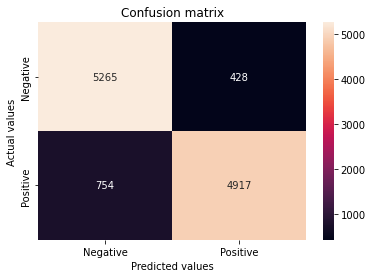

              precision    recall  f1-score   support

    Negative       0.73      0.95      0.83      1410
    Positive       0.93      0.66      0.77      1432

    accuracy                           0.80      2842
   macro avg       0.83      0.80      0.80      2842
weighted avg       0.83      0.80      0.80      2842



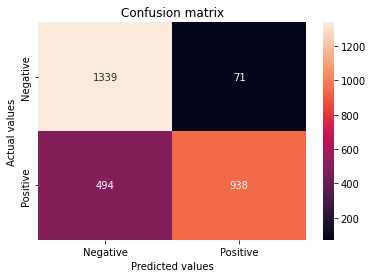

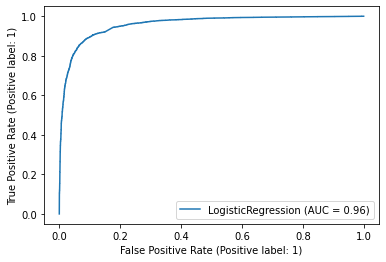

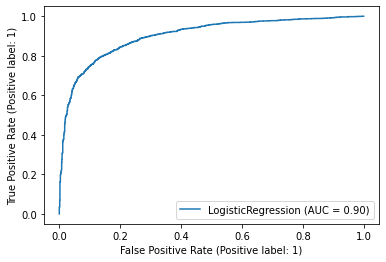

,input,output_proba,output_class
0,form_không đẹp_lắm,"(0.4386474015732905, 0.5613525984267095)",1
1,áo_rộng thật_sự nhanh_chật_lượng vải_tốt,"(0.4646216101652917, 0.5353783898347083)",1
2,màu túi_hơi tối_do ảnh_chụp,"(0.6681474279263144, 0.33185257207368557)",0
3,chất_liệu vải_không ổn_lắm,"(0.7776463727416287, 0.2223536272583713)",0
4,mã màu_đen hiện lên_áo màu_đen còn_mã đen hiện...,"(0.9179684431603199, 0.08203155683968008)",0
...,...,...,...
11359,bán_combo ghi_đôi nhưng_nhận chỉ đôi_tất hơi_mỏng,"(0.7796936845478296, 0.22030631545217041)",0
11360,áo_đẹp from_chuẩn sẽ ủng_hộ tiếp,"(0.004412615571534051, 0.995587384428466)",1
11361,đặt_màu trắng_kem giao_màu xanh_đen giao_không...,"(0.9557012480303715, 0.044298751969628535)",0
11362,đồ_chơi tí_hon_nên_dừng bán sản_phẩm như_kẻo n...,"(0.7663980021588869, 0.23360199784111313)",0


,input,output_proba,output_class
0,bán hàng kỉ quấn đầy đủ chất lượng ok đồ chuẩn...,"(0.48159796534502486, 0.5184020346549751)",1
1,đặt xl áo ghi xl nhưng bé tí tẹo ngang size mì...,"(0.8521448671486482, 0.14785513285135182)",0
2,kẹp rất rất đẹp săn được giá sale hôm chỉ giá ...,"(0.5724634666664581, 0.42753653333354197)",0
3,không nghĩ áo đẹp giao hàng nhanh không bình t...,"(0.6209471455821225, 0.37905285441787756)",0
4,hôm nay mới nhận được nhưng nhìn qua thấy cũng...,"(0.7044428037958854, 0.2955571962041146)",0
...,...,...,...
2837,đặt dây buộc tóc nhưng chỉ nhận được cái nhắn ...,"(0.8797856820895619, 0.12021431791043817)",0
2838,chất vải đẹp có vẻ mát giao hàng nhanh chóng đ...,"(0.6245509356129456, 0.3754490643870544)",0
2839,dây nhìn tạm không đẹp mắc sai dây phải ngồi c...,"(0.8970152284934726, 0.10298477150652739)",0
2840,quần đẹp chất lượng ok nhưng chữ của quần màu ...,"(0.5266206280660491, 0.47337937193395085)",0


In [41]:
y_train_pred = logistic_model.predict(X_train_transformed)
y_test_pred = logistic_model.predict(X_test_transformed)

Model.confusionMatrix(y_train, y_train_pred['output_class'])
Model.confusionMatrix(y_test, y_test_pred['output_class'])

logistic_model.rocAuc(X_train_transformed, y_train)
logistic_model.rocAuc(X_test_transformed, y_test)

display(y_train_pred, y_test_pred)

              precision    recall  f1-score   support

    Negative       0.87      0.90      0.89      5693
    Positive       0.90      0.86      0.88      5671

    accuracy                           0.88     11364
   macro avg       0.88      0.88      0.88     11364
weighted avg       0.88      0.88      0.88     11364



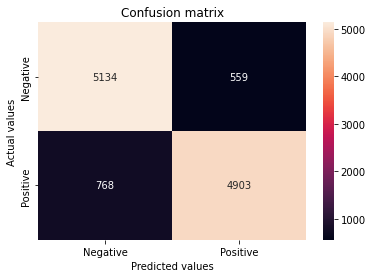

              precision    recall  f1-score   support

    Negative       0.76      0.92      0.83      1410
    Positive       0.90      0.71      0.79      1432

    accuracy                           0.81      2842
   macro avg       0.83      0.81      0.81      2842
weighted avg       0.83      0.81      0.81      2842



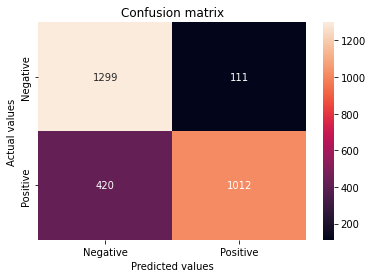

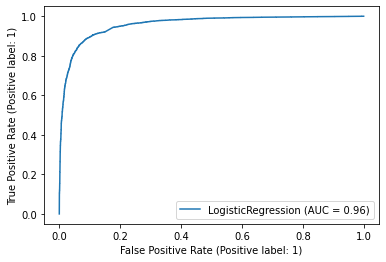

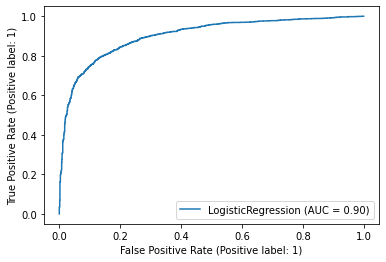

,input,output_proba,output_class
0,form_không đẹp_lắm,"(0.27938852559819094, 0.7206114744018083)",1
1,áo_rộng thật_sự nhanh_chật_lượng vải_tốt,"(0.5550811430542377, 0.4449188569457607)",0
2,màu túi_hơi tối_do ảnh_chụp,"(0.6092158558679219, 0.39078414413207957)",0
3,chất_liệu vải_không ổn_lắm,"(0.8389786109199422, 0.16102138908005956)",0
4,mã màu_đen hiện lên_áo màu_đen còn_mã đen hiện...,"(0.9999259433148628, 7.405668513621642e-05)",0
...,...,...,...
11359,bán_combo ghi_đôi nhưng_nhận chỉ đôi_tất hơi_mỏng,"(0.9542953245194388, 0.04570467548056075)",0
11360,áo_đẹp from_chuẩn sẽ ủng_hộ tiếp,"(1.4126967233954881e-05, 0.9999858730327645)",1
11361,đặt_màu trắng_kem giao_màu xanh_đen giao_không...,"(0.9999999961368786, 3.863115976991816e-09)",0
11362,đồ_chơi tí_hon_nên_dừng bán sản_phẩm như_kẻo n...,"(0.9995662767959296, 0.00043372320407211317)",0


,input,output_proba,output_class
0,bán hàng kỉ quấn đầy đủ chất lượng ok đồ chuẩn...,"(0.2775253204745166, 0.7224746795254852)",1
1,đặt xl áo ghi xl nhưng bé tí tẹo ngang size mì...,"(0.999737308147709, 0.0002626918522946248)",0
2,kẹp rất rất đẹp săn được giá sale hôm chỉ giá ...,"(0.06803047753757607, 0.9319695224624265)",1
3,không nghĩ áo đẹp giao hàng nhanh không bình t...,"(0.7278938523193605, 0.27210614768063934)",0
4,hôm nay mới nhận được nhưng nhìn qua thấy cũng...,"(0.9991247031097783, 0.0008752968902293736)",0
...,...,...,...
2837,đặt dây buộc tóc nhưng chỉ nhận được cái nhắn ...,"(0.999814019575968, 0.00018598042402974397)",0
2838,chất vải đẹp có vẻ mát giao hàng nhanh chóng đ...,"(0.9492395884572257, 0.050760411542773554)",0
2839,dây nhìn tạm không đẹp mắc sai dây phải ngồi c...,"(0.994447850343121, 0.005552149656880654)",0
2840,quần đẹp chất lượng ok nhưng chữ của quần màu ...,"(0.9614041467590597, 0.038595853240945284)",0


In [42]:
y_train_pred = bernoulli_model.predict(X_train_transformed)
y_test_pred = bernoulli_model.predict(X_test_transformed)

Model.confusionMatrix(y_train, y_train_pred['output_class'])
Model.confusionMatrix(y_test, y_test_pred['output_class'])

logistic_model.rocAuc(X_train_transformed, y_train)
logistic_model.rocAuc(X_test_transformed, y_test)

display(y_train_pred, y_test_pred)

              precision    recall  f1-score   support

    Negative       0.86      0.91      0.88      5693
    Positive       0.90      0.85      0.88      5671

    accuracy                           0.88     11364
   macro avg       0.88      0.88      0.88     11364
weighted avg       0.88      0.88      0.88     11364



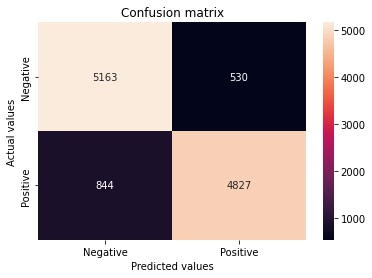

              precision    recall  f1-score   support

    Negative       0.73      0.94      0.82      1410
    Positive       0.92      0.65      0.76      1432

    accuracy                           0.80      2842
   macro avg       0.82      0.80      0.79      2842
weighted avg       0.83      0.80      0.79      2842



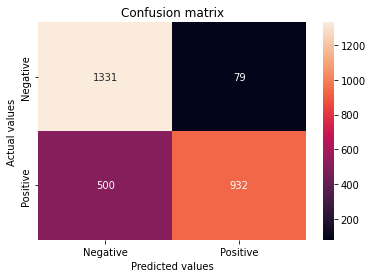

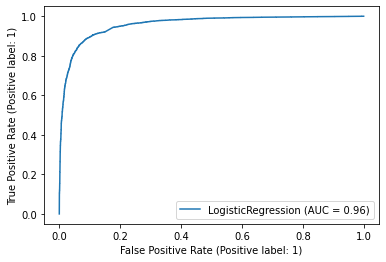

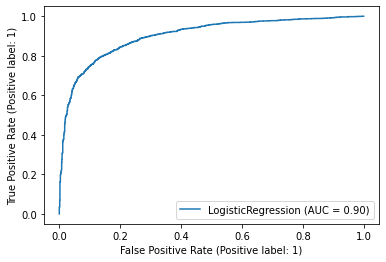

,input,output_proba,output_class
0,form_không đẹp_lắm,"(0.4416788692111604, 0.5583211307888396)",1
1,áo_rộng thật_sự nhanh_chật_lượng vải_tốt,"(0.49147172677271195, 0.5085282732272882)",0
2,màu túi_hơi tối_do ảnh_chụp,"(0.7810384724275545, 0.21896152757244533)",0
3,chất_liệu vải_không ổn_lắm,"(0.8673607994057431, 0.13263920059425702)",0
4,mã màu_đen hiện lên_áo màu_đen còn_mã đen hiện...,"(0.9559105441189036, 0.04408945588109635)",0
...,...,...,...
11359,bán_combo ghi_đôi nhưng_nhận chỉ đôi_tất hơi_mỏng,"(0.8726656001389425, 0.12733439986105763)",0
11360,áo_đẹp from_chuẩn sẽ ủng_hộ tiếp,"(6.2369310052548105e-06, 0.9999937630689948)",1
11361,đặt_màu trắng_kem giao_màu xanh_đen giao_không...,"(0.9900398854317436, 0.009960114568256377)",0
11362,đồ_chơi tí_hon_nên_dừng bán sản_phẩm như_kẻo n...,"(0.846558897303596, 0.1534411026964039)",0


,input,output_proba,output_class
0,bán hàng kỉ quấn đầy đủ chất lượng ok đồ chuẩn...,"(0.6167365115170309, 0.3832634884829691)",0
1,đặt xl áo ghi xl nhưng bé tí tẹo ngang size mì...,"(0.894104170676397, 0.10589582932360307)",0
2,kẹp rất rất đẹp săn được giá sale hôm chỉ giá ...,"(0.5357170371194775, 0.4642829628805225)",0
3,không nghĩ áo đẹp giao hàng nhanh không bình t...,"(0.7478781389986306, 0.25212186100136963)",0
4,hôm nay mới nhận được nhưng nhìn qua thấy cũng...,"(0.8129891112243327, 0.1870108887756672)",0
...,...,...,...
2837,đặt dây buộc tóc nhưng chỉ nhận được cái nhắn ...,"(0.9438388548132551, 0.05616114518674483)",0
2838,chất vải đẹp có vẻ mát giao hàng nhanh chóng đ...,"(0.7424478908159614, 0.2575521091840386)",0
2839,dây nhìn tạm không đẹp mắc sai dây phải ngồi c...,"(0.9674587281326442, 0.032541271867355594)",0
2840,quần đẹp chất lượng ok nhưng chữ của quần màu ...,"(0.5644451750697096, 0.4355548249302903)",0


In [43]:
y_train_pred = svc_model.predict(X_train_transformed)
y_test_pred = svc_model.predict(X_test_transformed)

Model.confusionMatrix(y_train, y_train_pred['output_class'])
Model.confusionMatrix(y_test, y_test_pred['output_class'])

logistic_model.rocAuc(X_train_transformed, y_train)
logistic_model.rocAuc(X_test_transformed, y_test)

display(y_train_pred, y_test_pred)

In [44]:
Model.saveByPickle(svc_model, "./models/svc_model_comments.pickle")
Model.saveByPickle(logistic_model, "./models/logistic_model_comments.pickle")
Model.saveByPickle(bernoulli_model, "./models/bernoulli_model_comments.pickle")

<modules.model.SentimentModel object at 0x7f55797bc400> has been saved at ./models/svc_model_comments.pickle.
<modules.model.SentimentModel object at 0x7f55797bc100> has been saved at ./models/logistic_model_comments.pickle.
<modules.model.SentimentModel object at 0x7f55797bc280> has been saved at ./models/bernoulli_model_comments.pickle.


In [45]:
ngram_words.to_csv("./data/ngrams.csv")